In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Example: Load stock data (e.g., IBM)
IBM_stock_data = yf.download('IBM', start='2024-01-01', end='2024-10-31')

# Generate sine wave data
T = 500
time = np.linspace(0, 10, T)
sine_data = np.sin(time)

[*********************100%***********************]  1 of 1 completed


In [26]:
print(IBM_stock_data.head(3))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  162.830002  163.289993  160.460007  161.500000  157.093857   
2024-01-03  161.000000  161.729996  160.080002  160.100006  155.732071   
2024-01-04  160.220001  161.809998  160.169998  160.860001  156.471329   

             Volume  
Date                 
2024-01-02  3825000  
2024-01-03  4086100  
2024-01-04  3212000  


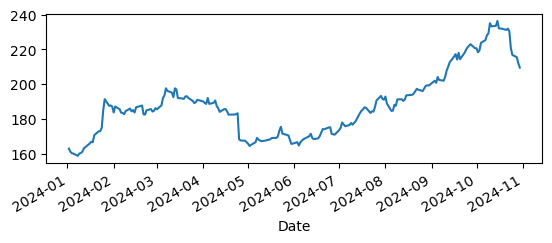

In [27]:
IBM_stock_data['Open'].plot(subplots=True, layout=(2,1));

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = IBM_stock_data[0:int(len(IBM_stock_data)*0.9)], IBM_stock_data[int(len(IBM_stock_data)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_1156/2653395656.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [29]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_1156/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [19]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 0.983586612869091
MAE: 0.8170146730728061
RMSE: 0.9917593522972652


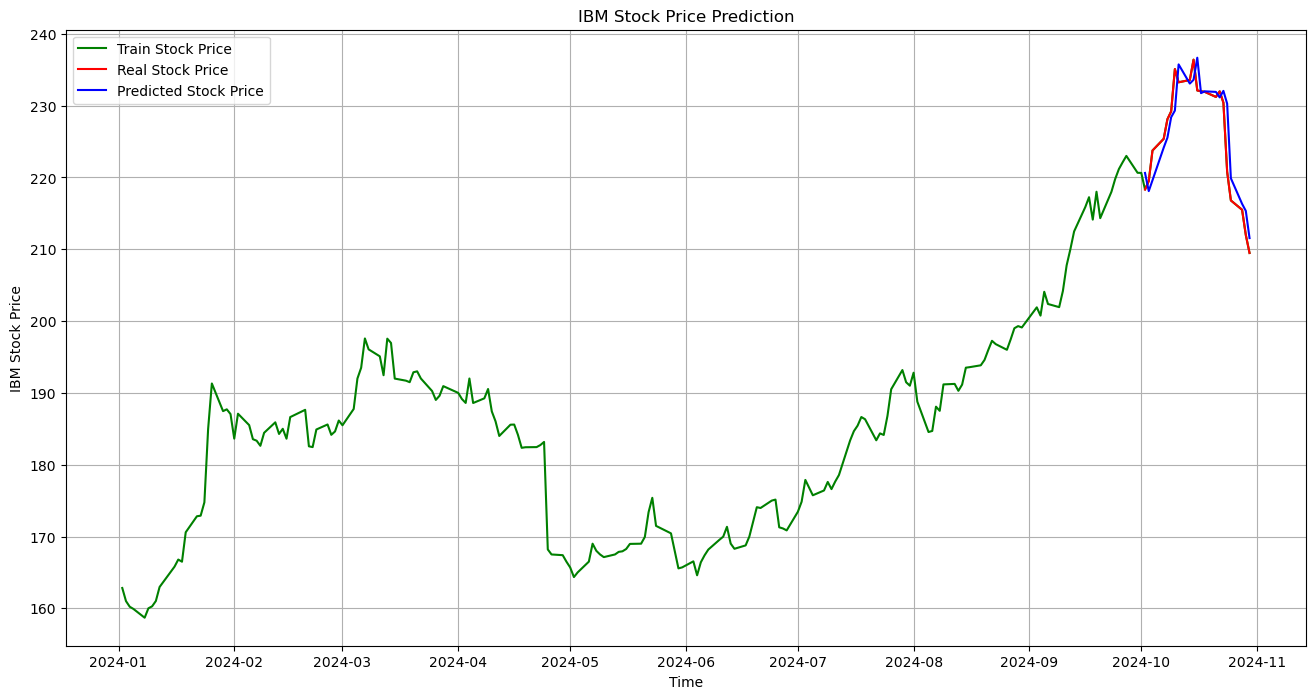

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(IBM_stock_data.index[-600:], IBM_stock_data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

# 1. Moving Average (MA) model

In [21]:
def moving_average(data, q):
    """Compute the Moving Average (MA) model of order q."""
    ma_series = np.zeros_like(data)
    for t in range(q, len(data)):
        ma_series[t] = np.mean(data[t-q:t])
    return ma_series


# 2. Autoregression (AR) model 

In [3]:
def autoregression(data, p):
    """Compute the Autoregressive (AR) model of order p."""
    ar_series = np.zeros_like(data)
    for t in range(p, len(data)):
        ar_series[t] = np.dot(data[t-p:t][::-1], np.ones(p) / p)  # Averaged AR coefficients
    return ar_series


# 3.ARMA model

In [4]:
def arma(data, p, q):
    """Compute the ARMA model of order (p, q)."""
    ar_part = autoregression(data, p)
    ma_part = moving_average(data, q)
    return ar_part + ma_part


# Time Series Analysis Using ARMA, ARIMA, and SARIMA Models 

In [9]:
import statsmodels.api as sm

# ARMA model
arma_model = sm.tsa.ARIMA(IBM_stock_data, order=(2, 0, 2)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -439.871
Date:                Fri, 01 Nov 2024   AIC                            891.741
Time:                        06:57:04   BIC                            912.870
Sample:                             0   HQIC                           900.245
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.5118     14.289     10.254      0.000     118.506     174.517
ar.L1          0.0321      0.049      0.650      0.516      -0.065       0.129
ar.L2          0.9552      0.048     19.844      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

In [10]:
# ARIMA model
arima_model = sm.tsa.ARIMA(IBM_stock_data, order=(2, 1, 2)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -435.690
Date:                Fri, 01 Nov 2024   AIC                            881.379
Time:                        06:57:07   BIC                            898.966
Sample:                             0   HQIC                           888.458
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1040      0.271     -0.384      0.701      -0.634       0.426
ar.L2          0.8224      0.252      3.263      0.001       0.328       1.316
ma.L1          0.1677      0.299      0.562      0.5

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1]:
# SARIMA model 
sarima_model = sm.tsa.SARIMAX(IBM_stock_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_model.summary())

NameError: name 'sm' is not defined